##Algoritmos Hibridos
#PSO + Busca Cuco para resoluçao de rosembrock em 30 dimensoes

Modifiquei o Algoritmo e utilizei a função de Rosenbrock de 30 dimensoes apresentado no seu Blog, alem de comparar com o algoritmo DE-Canonical mostrado em aula.

In [29]:
# Função Rosenbrock em 30 dimensões
rosenbrock <- function(x) {
  d <- length(x)
  xi <- x[1:(d-1)]
  xnext <- x[2:d]
  sum <- sum(100*(xnext-xi^2)^2 + (xi-1)^2)
  return(sum)
}

# Função PSO + Busca Cuco para Rosenbrock em 30 dimensões
hybrid_pso_cuckoo <- function(iterations, population_size, cuckoo_trials) {
  # Parâmetros do PSO
  w <- 0.5 # Peso inercial
  c1 <- 1 # Coeficiente de aprendizado cognitivo
  c2 <- 2 # Coeficiente de aprendizado social

  # Limites do espaço de busca
  lower_bound <- rep(-5, 30)
  upper_bound <- rep(5, 30)

  # Inicialização
  population <- matrix(runif(population_size * 30, lower_bound, upper_bound), ncol = 30)
  best_positions <- population
  best_fitness <- apply(population, 1, function(x) rosenbrock(x))
  global_best_position <- population[which.min(best_fitness), ]

  # Iterações
  for (i in 1:iterations) {
    # Atualização das partículas
    for (j in 1:population_size) {
      velocity <- w * population[j, ] +
                  c1 * runif(30) * (best_positions[j, ] - population[j, ]) +
                  c2 * runif(30) * (global_best_position - population[j, ])

      position <- population[j, ] + velocity

      # Verificar limites
      position <- pmax(pmin(position, upper_bound), lower_bound)

      # Atualizar posição e fitness
      population[j, ] <- position
      fitness <- rosenbrock(position)

      # Atualizar melhor posição e fitness
      if (fitness < best_fitness[j]) {
        best_positions[j, ] <- position
        best_fitness[j] <- fitness
      }

      # Atualizar melhor posição global
      if (fitness < rosenbrock(global_best_position)) {
        global_best_position <- position
      }
    }

    # Busca Cuco
    for (j in 1:population_size) {
      for (k in 1:cuckoo_trials) {
        new_position <- best_positions[j, ] + runif(30, -1, 1) * (best_positions[j, ] - global_best_position)

        # Verificar limites
        new_position <- pmax(pmin(new_position, upper_bound), lower_bound)

        new_fitness <- rosenbrock(new_position)

        # Atualizar melhor posição e fitness
        if (new_fitness < best_fitness[j]) {
          best_positions[j, ] <- new_position
          best_fitness[j] <- new_fitness
        }

        # Atualizar melhor posição global
        if (new_fitness < rosenbrock(global_best_position)) {
          global_best_position <- new_position
        }
      }
    }

    # Imprimir melhor fitness a cada iteração
    print(paste("Iteração", i, "- Melhor fitness:", min(best_fitness)))
  }

  # Retornar a melhor solução encontrada
  return(global_best_position)
}

# Configurações do algoritmo
iterations <- 1000
population_size <- 50
cuckoo_trials <- 5
execs <- 1
funcs <- c(Rosenbrock)
result <-  vector("list",execs)
best <- rep(NA,execs)
res <- matrix(rep(NA,3*length(funcs)),nrow = 3)
#j = 1

cat("Running...\n")
#for(f in func){
for(f in 1:length(funcs)){
   lb <- rep(-5,dim)
   ub <- rep(5,dim)
   #cat("f = ", f, "\n")
   for(i in 1:execs){
      #cat("exec = ",i,"\n")
      #cat("Func = ", f, "\n")
      result[[i]] <- best_solution <- hybrid_pso_cuckoo(iterations, population_size, cuckoo_trials)
      best[i] <- min(result[[i]])
   }
   res[1,f] <- min(best)
   res[2,f] <- mean(best)
   res[3,f] <- sd(best)
   #j = j + 1
}
View(res)
# Executar o algoritmo híbrido PSO + Busca Cuco para Rosenbrock
#best_solution <- hybrid_pso_cuckoo(iterations, population_size, cuckoo_trials)
#print("Melhor solução encontrada:")
#print(best_solution)


Running...
[1] "Iteração 1 - Melhor fitness: 143909.987555788"
[1] "Iteração 2 - Melhor fitness: 74084.8292454249"
[1] "Iteração 3 - Melhor fitness: 24033.5873875191"
[1] "Iteração 4 - Melhor fitness: 18305.4358411525"
[1] "Iteração 5 - Melhor fitness: 18305.4358411525"
[1] "Iteração 6 - Melhor fitness: 12642.8590423174"
[1] "Iteração 7 - Melhor fitness: 11948.8051486079"
[1] "Iteração 8 - Melhor fitness: 10060.2256655261"
[1] "Iteração 9 - Melhor fitness: 10060.2256655261"
[1] "Iteração 10 - Melhor fitness: 8818.37806272169"
[1] "Iteração 11 - Melhor fitness: 7153.58128254765"
[1] "Iteração 12 - Melhor fitness: 7052.98390331647"
[1] "Iteração 13 - Melhor fitness: 5773.27548377225"
[1] "Iteração 14 - Melhor fitness: 5652.24079434411"
[1] "Iteração 15 - Melhor fitness: 5652.24079434411"
[1] "Iteração 16 - Melhor fitness: 3019.49101113804"
[1] "Iteração 17 - Melhor fitness: 2558.34228692642"
[1] "Iteração 18 - Melhor fitness: 2558.34228692642"
[1] "Iteração 19 - Melhor fitness: 2469.6589

0.0001001017
0.0001001017
NA


#Algoritmo DE-Canonical
apesar de não ter acesso ao algoritmo, consegui fotos dos resultados apresentados na execução em tempo real do algoritmo em questão, e fiz a comparação do nosso algoritmo com ele.

No algoritmo em questao os parametros sao definidos com 1000 iteraçoes em uma população de 50 e executado 20 vezes, resultando no menor valor de 60.54528.

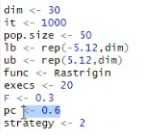
Parametros do Algoritmo do Professor.

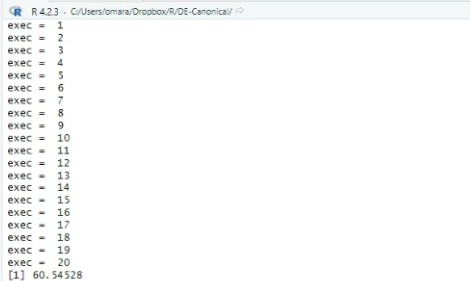
Resultado Algoritmo Professor apos 20 execuçoes.

##RESULTADOS

Os resultados Obtidos no algoritmo Hibrido PSO+Busca-Cuco, foram satisfatorios se comparado ao DE-canonical apresentado na aula. Em alguns casos conseguir um resultado otimo de 58.9 em apenas 100 iteraçoes, ja com 1000 iteraçoes o resultado e surpreendente obtendo o resultado de 5.16 como mostra as figuras abaixo. Porem a variação nos resultados do mesmo ainda não e o desejado em algumas execuçoes o valor fica bem acima da media estipulada pelo resultado do professor.

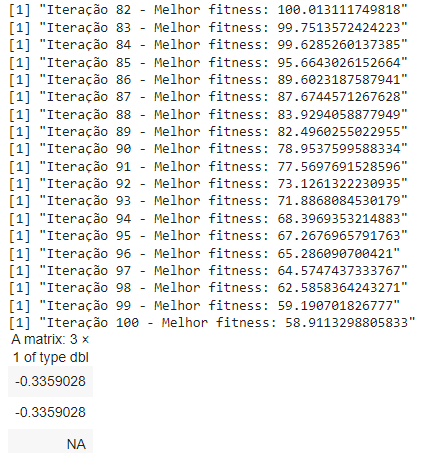

Resultado com 100 iteraçoes


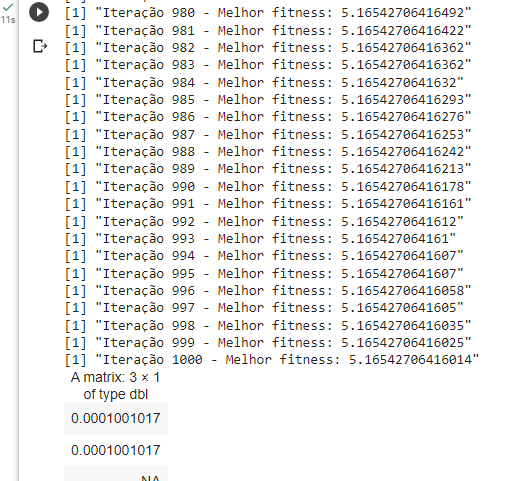


Resultado com 1000 Iteraçoes

#Referencias
https://gitlab.com/omar.carmona/real-coded-genetic-algorithm